<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

# Soporte para funciones de la libreria scipy
from scipy.stats import norm, kurtosis

(a.) Enlazar Google Drive y cargar imagen en variable.

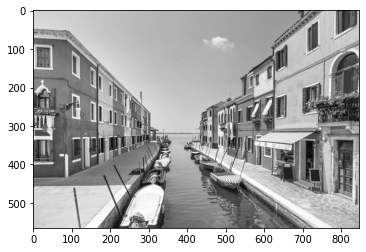

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
imagenEntrada = cv2.imread('/content/drive/MyDrive/vision_artificial/images/HCColor2.jpg',cv2.IMREAD_GRAYSCALE)
# imagenEntrada = cv2.cvtColor(imagenEntrada, cv2.COLOR_BGR2RGB) # OpenCV usa el ordenamiento BGR por defecto, mientras que matplotlib asume RGB.
plotInputIm = plt.imshow(imagenEntrada, cmap="gray")

(b.) Calcular el histograma para la imagen mostrada arriba. Crear una función que haga dicho cálculo, sin necesidad de acceder a todas las filas/columnas de la image. Comparar resultado con funciones propias de Python.

In [ ]:
# Principio de operación de la función: 
# (1.) Un vector con longitud igual a la profundidad de píxel de la imagen bajo inspección.
# (2.) Contar frecuencias de aparición de cada valor de píxel.
# (3.) Almacenar estas frecuencias en las columnas del vector creado en (1.)

# INICIO - función
def fnHistograma(inputIm):
 vHistograma = np.zeros((1,256))
 pixelRange = range(0,256)
 
 for pixelValue in pixelRange: # Algoritmo para la función propuesto en (2.):  
  vHistograma[0,pixelValue] = (inputIm == pixelValue).sum() # https://aarsh.dev/2017/10/15/python-numpy-count-elements/

 return vHistograma
# FINAL - Función 

# Caso donde la imagen está en escala de grises
histogramaEG = fnHistograma(imagenEntrada)
histogramaEG = list(histogramaEG.flatten()) # https://stackoverflow.com/questions/1966207/convert-numpy-array-to-python-list

# Caso donde la imagen está en RGB (color)
# histogramaRC = fnHistograma(imagenEntrada[:,:,0])
# histogramaRC = list(histogramaRC.flatten())
# histogramaGC = fnHistograma(imagenEntrada[:,:,1])
# histogramaGC = list(histogramaGC.flatten())
# histogramaBC = fnHistograma(imagenEntrada[:,:,2])
# histogramaBC = list(histogramaBC.flatten())


(c.) Visualización del histograma

<BarContainer object of 256 artists>

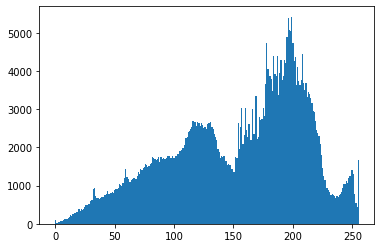

In [ ]:
valsPixel = np.arange(256)

# creating the bar plot:
#
# En ejemplos en la red, valsPixel (vector eje x) puede ser ndarray (longitud,), pero histogramaEG debería ser una lista de n ítems.
# Referencia: https://pythonspot.com/matplotlib-bar-chart/

plt.bar(valsPixel,histogramaEG, align='center',width = 1)
# plt.ylabel('Valor - píxel')
# plt.ylabel('Frecuencia')
# plt.title('Histograma de imagen en escala de grises.')
# plt.show()


(d.) Ejercicio: visualizar los histogramas de cada canal de color de una imagen RGB. Utilice un subplot para poder comparar los histogramas por canales de color. Considere la información propuesta en:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py

<BarContainer object of 256 artists>

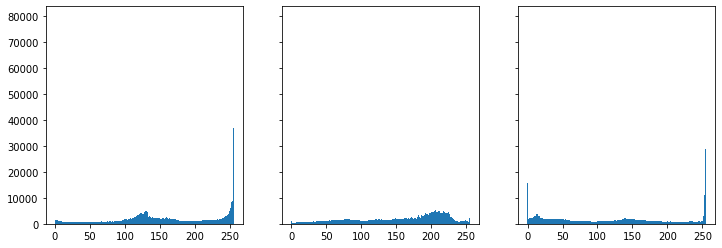

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].bar(valsPixel,histogramaRC, align='center',width = 1) # En el nombre histogramaRC, RC indica que uno se está refiriendo al canal de color ROJO.
axs[1].bar(valsPixel,histogramaGC, align='center',width = 1)
axs[2].bar(valsPixel,histogramaBC, align='center',width = 1)

(e.) El histograma permite argumentar sobre el contraste de una imagen. No obstante, sería conveniente calcular alguna métrica de contraste. Considere la siguiente información, y evalúe numéricamente el contraste de imágenes etiquetadas como de alto o bajo contraste:

https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image

https://www.schorsch.com/en/kbase/glossary/contrast.html


Investigar: Tamura contrast feature



In [ ]:
# Hay varias fórmulas para calcular contraste. Considérese la sentencia if-elif-else:
# https://towardsdatascience.com/switch-case-statements-are-coming-to-python-d0caf7b2bfd3

def fnContrast(inputIm, contrastType):
  lMin = np.min(inputIm)
  lMax = np.max(inputIm)

  if "Luminance" == contrastType:
    contrastF = (lMax - lMin) / (lMin + 1)
  elif "Simple" == contrastType:
    contrastF = lMax / (lMin + 1)
  elif "Michelson" == contrastType:
    contrastF = (lMax - lMin) / (lMax + lMin)
  else:
    print("Nombre inválido para métrica de contraste.")
  
  return contrastF

contrastFeat = fnContrast(imagenEntrada, "Michelson")
print(contrastFeat)

1.0
